<a href="https://colab.research.google.com/github/Bonacelli/pycourses/blob/master/PyFinance/03_Plotting_a_stock_portfolio_vs_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Libraries

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=57750ab4238d62aeddf35aff98e2ce19480ec1af4c6b8f53a15e6bcaa9c6ddd0
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2fo7bq0/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

# 2. Data

In [ ]:
tickers = ["ITSA4.SA", "TRPL4.SA", "EGIE3.SA", "USIM5.SA", "VALE3.SA"]

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira

,EGIE3.SA,ITSA4.SA,TRPL4.SA,USIM5.SA,VALE3.SA
Date,,,,,
2015-08-04,18.844204,4.784252,5.776969,4.044700,15.813355
2015-08-05,18.530132,4.766749,5.684276,4.044700,16.608391
2015-08-06,18.373100,4.667565,5.599839,3.947705,17.106382
2015-08-07,18.216063,4.521699,5.500216,3.831311,16.092930
2015-08-10,18.305050,4.580048,5.529275,3.802212,16.905439
...,...,...,...,...,...
2020-07-29,44.500000,11.130000,21.459999,8.150000,62.950001
2020-07-30,44.669998,10.910000,21.760000,8.210000,61.270000
2020-07-31,46.169998,10.670000,22.540001,8.130000,60.709999


In [ ]:
ibov

Date
2015-08-04     50058.0
2015-08-05     50287.0
2015-08-06     50011.0
2015-08-07     48577.0
2015-08-10     49353.0
                ...   
2020-07-29    105605.0
2020-07-30    105009.0
2020-07-31    102912.0
2020-08-03    102830.0
2020-08-04    101137.5
Name: Adj Close, Length: 1235, dtype: float64

#3. Results

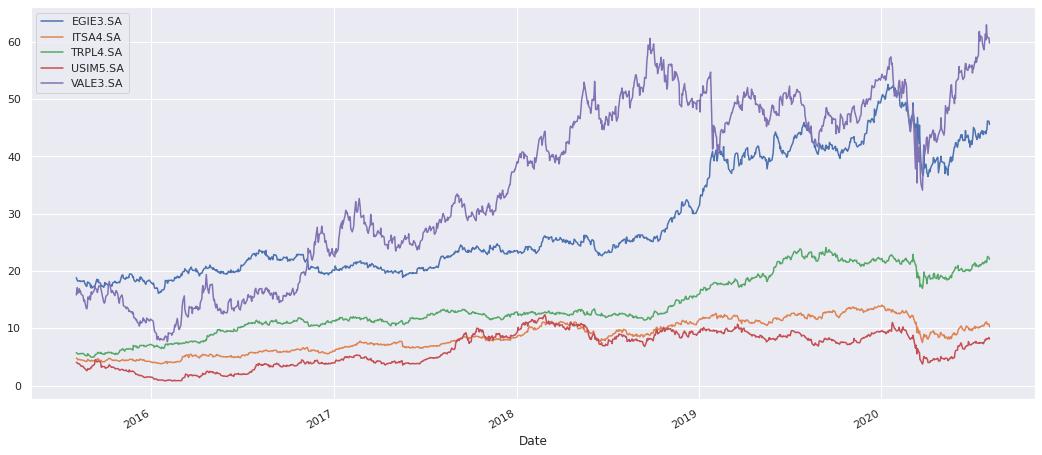

In [ ]:
sns.set()
carteira.plot(figsize=(18,8))

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0]) * 1000
carteira_normalizada

,EGIE3.SA,ITSA4.SA,TRPL4.SA,USIM5.SA,VALE3.SA
Date,,,,,
2015-08-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2015-08-05,983.333249,996.341683,983.954760,1000.000000,1050.276196
2015-08-06,975.000076,975.610325,969.338636,976.019264,1081.768030
2015-08-07,966.666599,945.121462,952.093745,947.242333,1017.679638
2015-08-10,971.388866,957.317446,957.123962,940.048041,1069.060860
...,...,...,...,...,...
2020-07-29,2361.468817,2326.382648,3714.750633,2014.982640,3980.812357
2020-07-30,2370.490061,2280.398389,3766.681177,2029.816973,3874.573026
2020-07-31,2450.090133,2230.233852,3901.700197,2010.038020,3839.159835


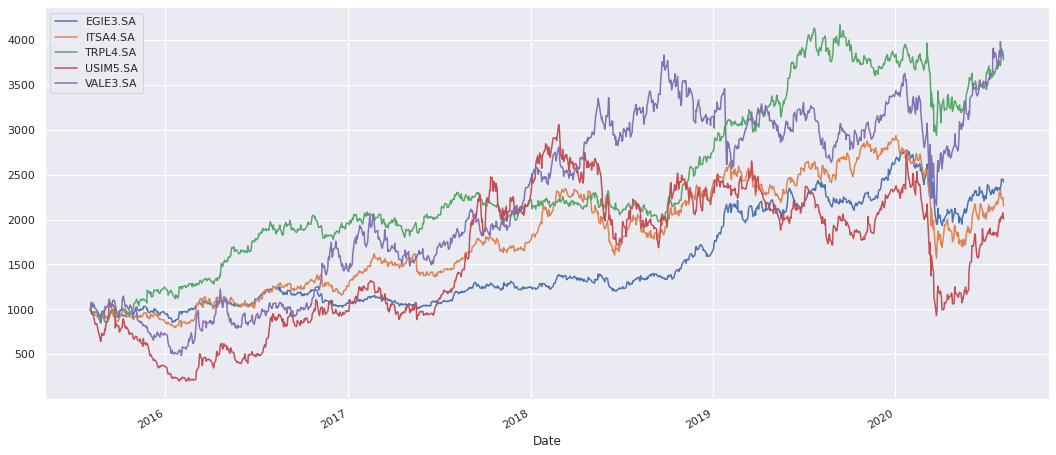

In [ ]:
carteira_normalizada.plot(figsize=(18,8))

In [ ]:
carteira_normalizada["SALDO"] = carteira_normalizada.sum(axis=1)
carteira_normalizada

,EGIE3.SA,ITSA4.SA,TRPL4.SA,USIM5.SA,VALE3.SA,SALDO
Date,,,,,,
2015-08-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2015-08-05,983.333249,996.341683,983.954760,1000.000000,1050.276196,5013.905889
2015-08-06,975.000076,975.610325,969.338636,976.019264,1081.768030,4977.736331
2015-08-07,966.666599,945.121462,952.093745,947.242333,1017.679638,4828.803776
2015-08-10,971.388866,957.317446,957.123962,940.048041,1069.060860,4894.939175
...,...,...,...,...,...,...
2020-07-29,2361.468817,2326.382648,3714.750633,2014.982640,3980.812357,14398.397095
2020-07-30,2370.490061,2280.398389,3766.681177,2029.816973,3874.573026,14321.959626
2020-07-31,2450.090133,2230.233852,3901.700197,2010.038020,3839.159835,14431.222038


In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*5000
ibov_normalizado

Date
2015-08-04     5000.000000
2015-08-05     5022.873467
2015-08-06     4995.305446
2015-08-07     4852.071597
2015-08-10     4929.581685
                  ...     
2020-07-29    10548.264014
2020-07-30    10488.733070
2020-07-31    10279.276040
2020-08-03    10271.085541
2020-08-04    10102.031643
Name: Adj Close, Length: 1235, dtype: float64

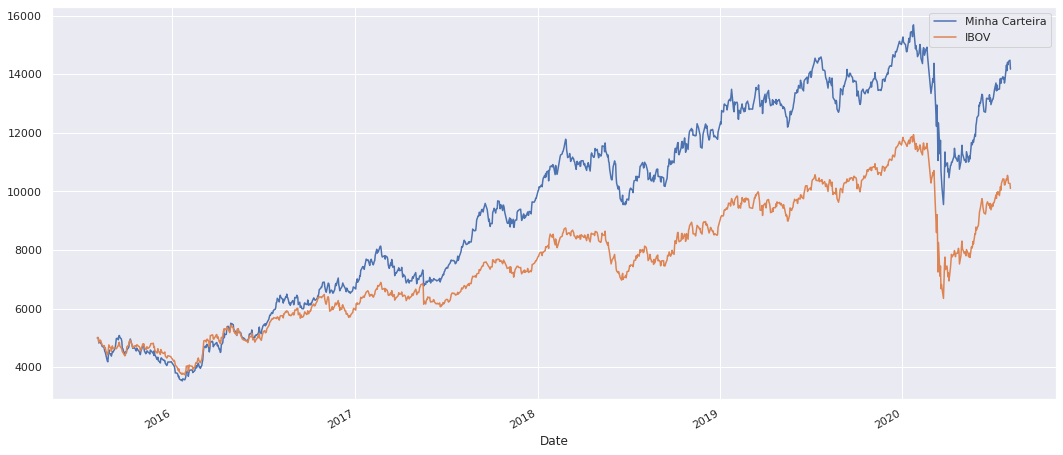

In [ ]:
carteira_normalizada["SALDO"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()

In [ ]:
carteira_normalizada.describe()

,EGIE3.SA,ITSA4.SA,TRPL4.SA,USIM5.SA,VALE3.SA,SALDO
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,1513.152576,1787.774436,2402.485107,1572.527947,2222.399358,9498.339424
std,528.953530,586.219098,877.537803,734.438753,961.231840,3380.003249
min,855.043275,795.464564,859.878457,203.836953,484.683929,3536.261809
25%,1087.263697,1269.757277,1895.865370,949.640371,1252.287835,6580.223100
50%,1264.128084,1771.057647,2156.932186,1805.328358,2465.368011,10027.047075
75%,2101.213082,2292.630353,3215.906290,2188.454497,3093.507978,12764.542966
max,2787.905209,2936.710473,4168.428671,3057.554333,3980.812357,15683.470672
